In [1]:
import torch
import numpy as np
import pandas as pd
from w1ot import w1ot, w2ot
from w1ot.data import make_2d_data, plot_2d_data

# device = torch.device("cuda")
device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
source, target = make_2d_data(dataset='bookshelf', n_samples=2**17, noise=0.01)
model = w1ot(source, target, 0.1, device, path='./saved_models/w1ot/bookshelf')
model.fit_potential_function(num_iters=1000,resume_from_checkpoint=True)

/home/cys/Desktop/w1ot/w1ot/ot.py:410: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=self.device)


Checkpoint loaded.
Could not load checkpoint. Training from scratch.


Training potential: 0it [00:00, ?it/s]


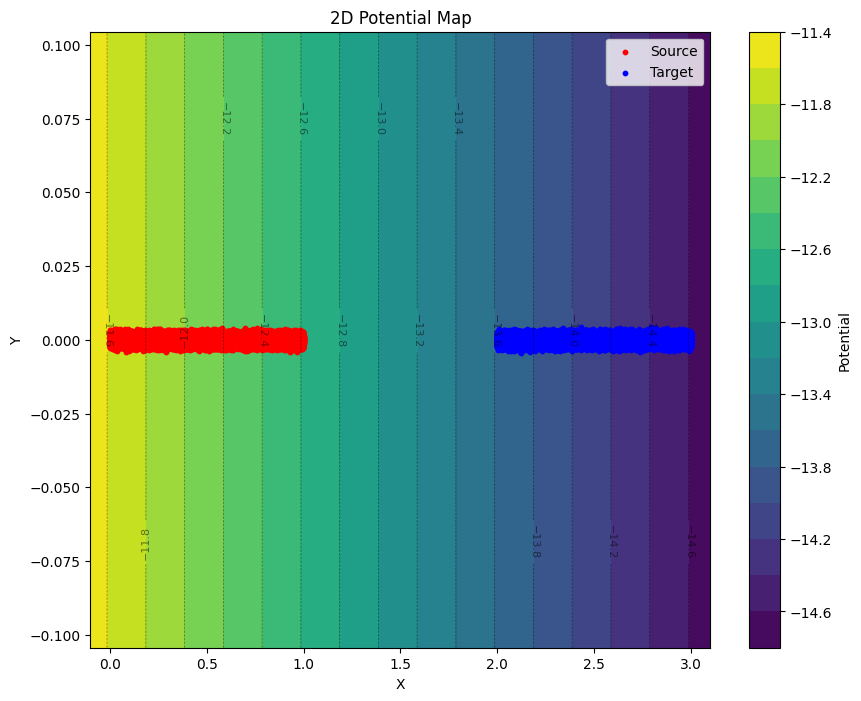

In [3]:
model.plot_2dpotential()

In [6]:
model.fit_distance_function(num_iters=2000, lr_min=1e-5, resume_from_checkpoint=False)

Training:   0%|                                                                                      | 1/2000 [00:00<05:41,  5.86it/s, D=0.51, G=0.50]

Checkpoint loaded.


Training: 100%|██████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 186.30it/s, D=0.50, G=0.50]

Final GAN stats:


Min Lipschitz constant:  0.9999991059303284
Max Lipschitz constant:  0.9999991059303284
Mean Lipschitz constant:  0.9999991059303284


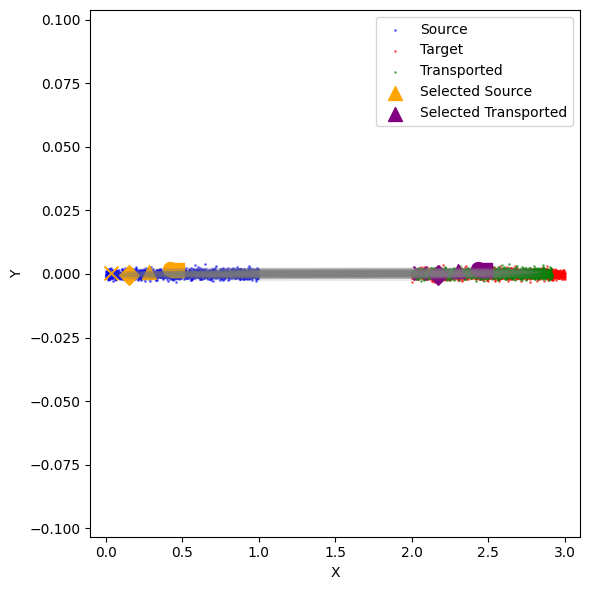

In [7]:
source_1, target_1 = make_2d_data(dataset='bookshelf', n_samples=2000, noise=0.01)
transported_1 = model.transport(source_1)
plot_2d_data(source_1, target_1, transported_1, True, 0.2)

In [8]:
source, target = make_2d_data(dataset='circles', n_samples=2**17, noise=0.01)
model = w1ot(source, target, 0.1, device,  path='./saved_models/w1ot/circles')
model.fit_potential_function(num_iters=10000,resume_from_checkpoint=True)

Checkpoint loaded.
Could not load checkpoint. Training from scratch.


Training potential: 0it [00:00, ?it/s]


In [9]:
model.fit_distance_function(num_iters=10000, resume_from_checkpoint=True)

Checkpoint loaded.
Resuming from iteration 10000


Training: 0it [00:00, ?it/s]

Checkpoint loaded.
Final GAN stats:


Min Lipschitz constant:  0.9978494048118591
Max Lipschitz constant:  0.9999091625213623
Mean Lipschitz constant:  0.9996994733810425


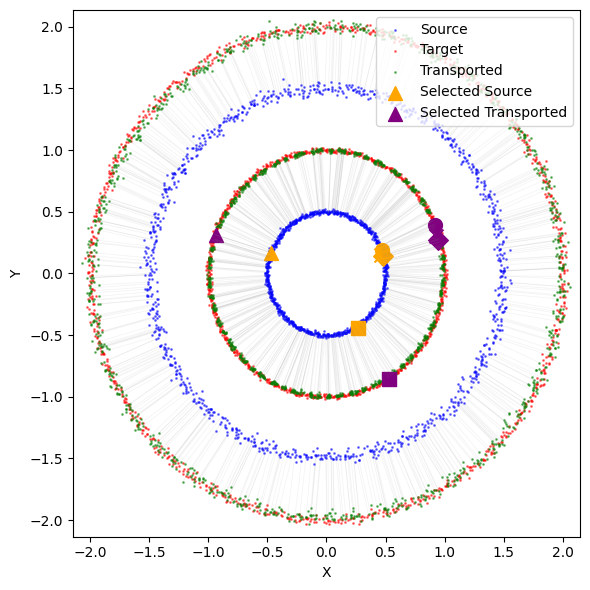

In [10]:
source_2, target_2 = make_2d_data(dataset='circles', n_samples=2000, noise=0.01)
transported_2 = model.transport(source_2)
plot_2d_data(source_2, target_2, transported_2, True, 0.5)

In [11]:
source, target = make_2d_data(dataset='swiss_roll', n_samples=2**17, noise=0.01)
model = w1ot(source, target, 0.1, device, path='./saved_models/w1ot/swiss_roll')
model.fit_potential_function(num_iters=10000,resume_from_checkpoint=True)
model.fit_distance_function(num_iters=40000, lr_init=1e-2, lr_min=1e-3, resume_from_checkpoint=True)

Checkpoint loaded.
Could not load checkpoint. Training from scratch.


Training potential: 0it [00:00, ?it/s]


Checkpoint loaded.
Resuming from iteration 40000


Training: 0it [00:00, ?it/s]

Checkpoint loaded.
Final GAN stats:


Min Lipschitz constant:  0.3876141607761383
Max Lipschitz constant:  0.9997729659080505
Mean Lipschitz constant:  0.9987255334854126


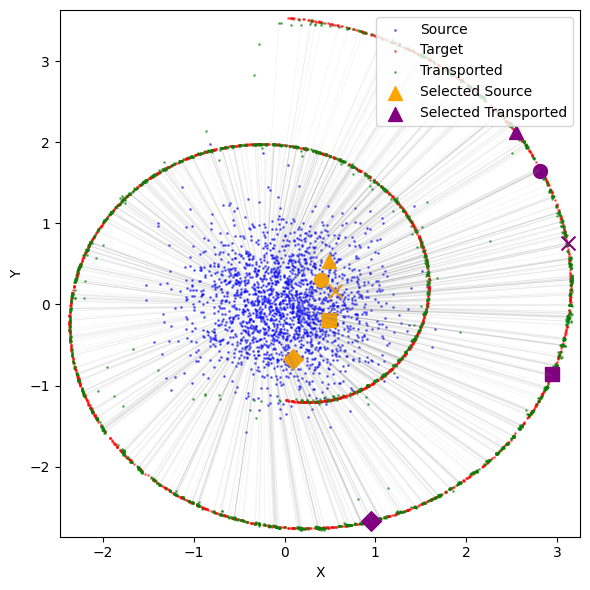

In [12]:
source_3, target_3 = make_2d_data(dataset='swiss_roll', n_samples=2000, noise=0.01)
transported_3 = model.transport(source_3)
plot_2d_data(source_3, target_3, transported_3, True, 0.5)

Checkpoint loaded.
Could not load checkpoint. Training from scratch.


Training potential: 100%|████████████████████████████████████████████████████████████████████████████| 100000/100000 [21:07<00:00, 78.92it/s, W1=1.32]


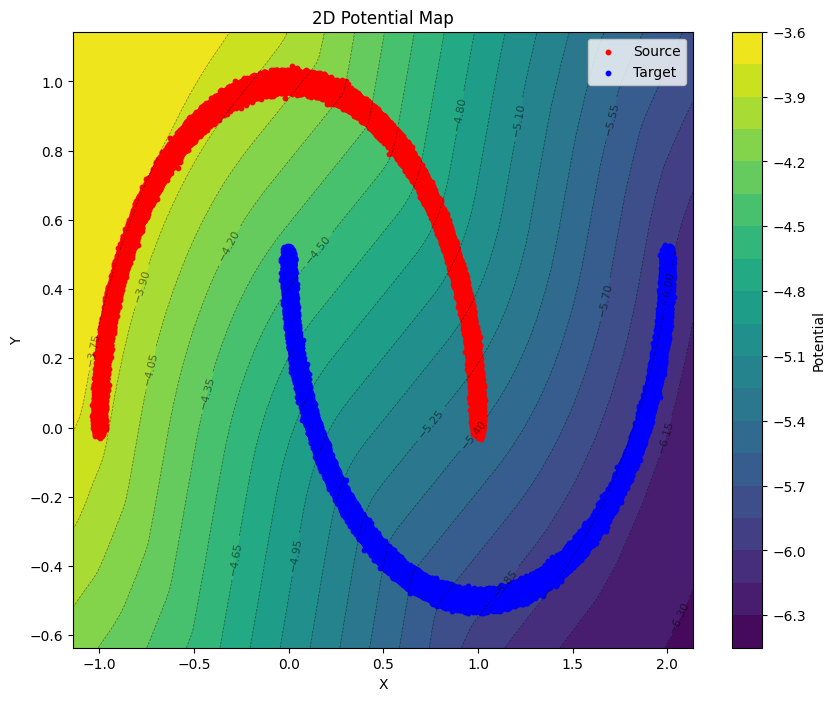

In [13]:
source, target = make_2d_data(dataset='moons', n_samples=2**20, noise=0.01)
model = w1ot(source, target, 0.1, device, path='./saved_models/w1ot/moons')
model.fit_potential_function(num_iters=100000, lr_init=1e-4, lr_min=1e-4, resume_from_checkpoint=True)
model.plot_2dpotential()

In [14]:
model.fit_distance_function(num_iters=10000, resume_from_checkpoint=False)

Training:   0%|                                                                                                             | 0/10000 [00:00<?, ?it/s]

Checkpoint loaded.


Training: 100%|████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 182.97it/s, D=0.51, G=0.49]


Final GAN stats:


Min Lipschitz constant:  0.9223206043243408
Max Lipschitz constant:  0.9999801516532898
Mean Lipschitz constant:  0.9982491731643677


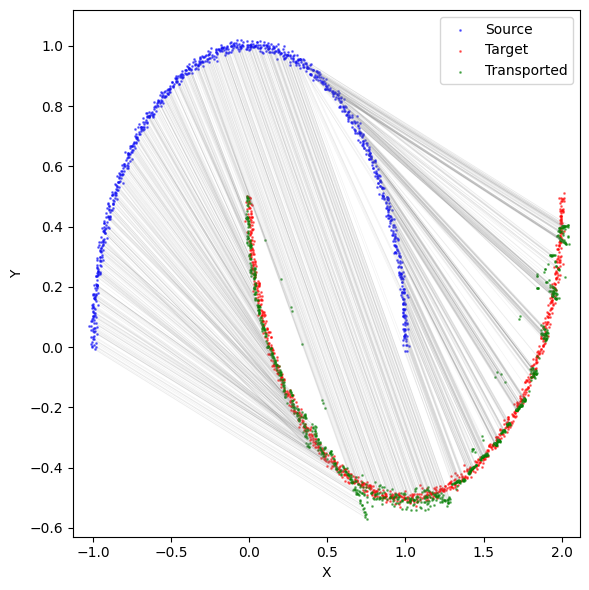

In [15]:
source_4, target_4 = make_2d_data(dataset='moons', n_samples=2000, noise=0.01)
transported_4 = model.transport(source_4)
plot_2d_data(source_4, target_4, transported_4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


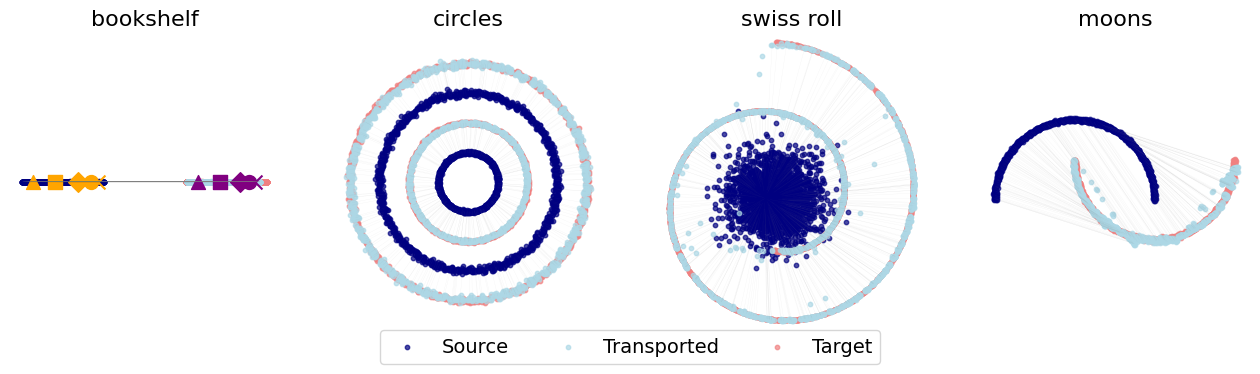

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transport_paths(ax, source, target, transported, title, show_marks=False, transport_ray_ratio=0.2, show_relative_position=True):
    """
    Plots the transport paths between target and transported samples on a given axis.
    """
    # Plot source points
    source_scatter = ax.scatter(source[:, 0], source[:, 1], c='navy', label=r'Source', s=10, alpha=0.7)

    # Plot target points
    target_scatter = ax.scatter(target[:, 0], target[:, 1], c='lightcoral', label=r'Target', s=10, alpha=0.7)

    if transported is not None:
        transported_scatter = ax.scatter(transported[:, 0], transported[:, 1], c='lightblue', label=r'Transported', s=10, alpha=0.7)

        # Plot rays (transport paths) between source and transported
        num_rays = int(len(source) * transport_ray_ratio)  # Limit the number of rays to avoid clutter
        indices = np.random.choice(len(source), num_rays, replace=False)

        for i in indices:
            ax.plot([source[i, 0], transported[i, 0]],
                    [source[i, 1], transported[i, 1]],
                    color='gray', alpha=0.1, linewidth=0.2)

        if show_marks and show_relative_position:
            # Randomly pick a few points to show specific transport paths more clearly
            source_indices = np.random.choice(len(source), 5, replace=False)
            markers = ['^', 'o', 's', 'D', 'x']  # Triangle, square, circle, diamond, cross
            colors = ['orange', 'purple']  # Colors for source and transported

            for i, idx in enumerate(source_indices):
                ax.scatter(source[idx, 0], source[idx, 1], marker=markers[i], color=colors[0], s=100)
                ax.scatter(transported[idx, 0], transported[idx, 1], marker=markers[i], color=colors[1], s=100)
    
    ax.set_title(title, fontsize=16)
    ax.axis('equal')
    # ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Only return source, target, transported handles for the legend
    return source_scatter, transported_scatter, target_scatter

def plot_all_scenarios(scenarios, sources, targets, transporteds, save_path='transport_paths.png'):
    """
    Plot transport paths for multiple scenarios in a single figure with subplots.
    """
    fig, axes = plt.subplots(1, len(scenarios), figsize=(16, 4))

    handles = None
    for i, scenario in enumerate(scenarios):
        if scenario == 'bookshelf':
            h = plot_transport_paths(axes[i], sources[i], targets[i], transporteds[i], title=f'{scenario}', show_marks=True)
        else:
            h = plot_transport_paths(axes[i], sources[i], targets[i], transporteds[i], title=f'{scenario}', show_marks=False)
        
        # Capture legend handles from the first plot
        if handles is None:
            handles = h

    # Manually set the legend with only the handles for Source, Transported, and Target
    fig.legend(handles=handles, labels=['Source', 'Transported', 'Target'], loc='lower center', ncol=3, fontsize=14)
    # plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust for the legend space

    # Save the figure
    plt.savefig(save_path, format='eps')
    plt.show()

# Example usage with your data
# Assuming source_i, target_i, and transported_i are numpy arrays for each scenario

scenarios = ['bookshelf', 'circles', 'swiss roll', 'moons']
sources = [source_1, source_2, source_3, source_4]       # Replace with your actual source_i data
targets = [target_1, target_2, target_3, target_4]       # Replace with your actual target_i data
transporteds = [transported_1, transported_2, transported_3, transported_4]   # Replace with your actual transported_i data

# Plot and save the figure
plot_all_scenarios(scenarios, sources, targets, transporteds, save_path='./toy_data.eps')


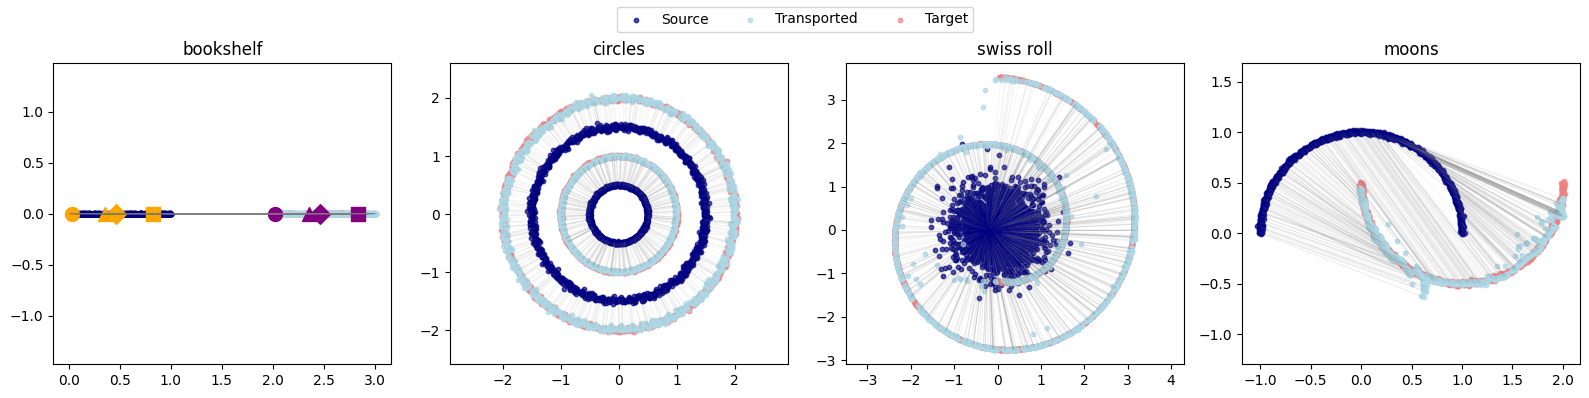

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transport_paths(ax, source, target, transported, title, show_marks=False, transport_ray_ratio=0.5, show_relative_position=True):
    """
    Plots the transport paths between target and transported samples on a given axis.
    """
    # Plot source points
    source_scatter = ax.scatter(source[:, 0], source[:, 1], c='navy', label=r'Source', s=10, alpha=0.7)

    # Plot target points
    target_scatter = ax.scatter(target[:, 0], target[:, 1], c='lightcoral', label=r'Target', s=10, alpha=0.7)

    if transported is not None:
        transported_scatter = ax.scatter(transported[:, 0], transported[:, 1], c='lightblue', label=r'Transported', s=10, alpha=0.7)

        # Plot rays (transport paths) between source and transported
        num_rays = int(len(source) * transport_ray_ratio)  # Limit the number of rays to avoid clutter
        indices = np.random.choice(len(source), num_rays, replace=False)

        for i in indices:
            ax.plot([source[i, 0], transported[i, 0]],
                    [source[i, 1], transported[i, 1]],
                    color='gray', alpha=0.1, linewidth=0.5)

        if show_marks and show_relative_position:
            # Randomly pick a few points to show specific transport paths more clearly
            source_indices = np.random.choice(len(source), 4, replace=False)
            markers = ['^', 'o', 's', 'D']  # Triangle, square, circle, diamond, cross
            colors = ['orange', 'purple']  # Colors for source and transported

            for i, idx in enumerate(source_indices):
                ax.scatter(source[idx, 0], source[idx, 1], marker=markers[i], color=colors[0], s=100)
                ax.scatter(transported[idx, 0], transported[idx, 1], marker=markers[i], color=colors[1], s=100)
    
    ax.set_title(title)
    ax.axis('equal')

    # Only return source, target, transported handles for the legend
    return source_scatter, transported_scatter, target_scatter

def plot_all_scenarios(scenarios, sources, targets, transporteds):
    """
    Plot transport paths for multiple scenarios in a single figure with subplots.
    """
    fig, axes = plt.subplots(1, len(scenarios), figsize=(16, 4))

    handles = None
    for i, scenario in enumerate(scenarios):
        if scenario == 'bookshelf':
            h = plot_transport_paths(axes[i], sources[i], targets[i], transporteds[i], title=f'{scenario}', show_marks=True)
        else:
            h = plot_transport_paths(axes[i], sources[i], targets[i], transporteds[i], title=f'{scenario}', show_marks=False)
        
        # Capture legend handles from the first plot
        if handles is None:
            handles = h

    # Manually set the legend with only the handles for Source, Transported, and Target
    fig.legend(handles=handles, labels=['Source', 'Transported', 'Target'], loc='upper center', ncol=3)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust for the legend space
    plt.show()

# Example usage with your data
# Assuming source_i, target_i, and transported_i are numpy arrays for each scenario

scenarios = ['bookshelf', 'circles', 'swiss roll', 'moons']
sources = [source_1, source_2, source_3, source_4]       # Replace with your actual source_i data
targets = [target_1, target_2, target_3, target_4]       # Replace with your actual target_i data
transporteds = [transported_1, transported_2, transported_3, transported_4]   # Replace with your actual transported_i data

plot_all_scenarios(scenarios, sources, targets, transporteds)


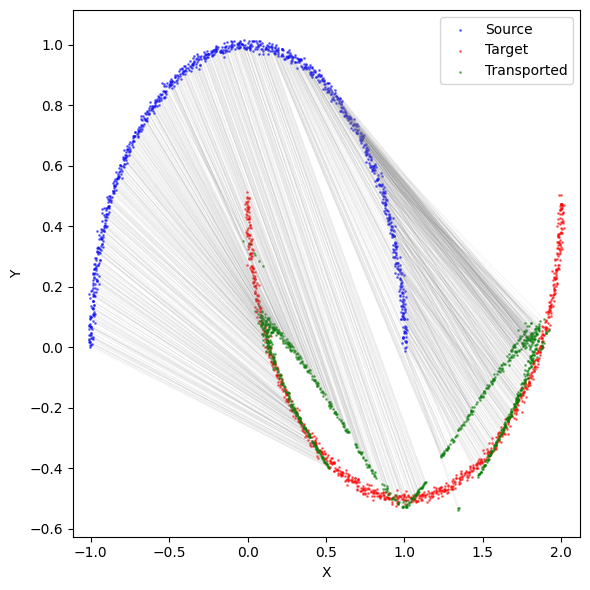

In [9]:
source, target = make_2d_data(dataset='moons', n_samples=2000, noise=0.01)
transported = model.transport(source)
plot_2d_data(source, target, transported)

Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.26it/s, W2=1.02]


Training completed.


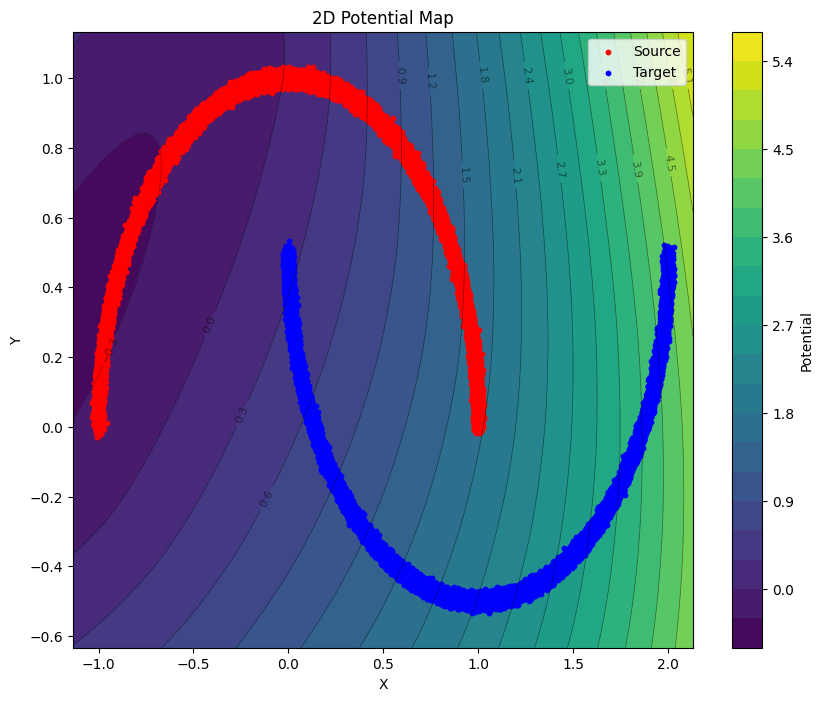

In [2]:
source, target = make_2d_data(dataset='moons', n_samples=2**17, noise=0.01)
model = w2ot(source, target, 0.1, device, path='./saved_models/w2ot/moons_1k')
model.fit_potential_function(num_iters=1000, resume_from_checkpoint=False)
model.plot_2dpotential()

Training: 100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:36<00:00, 21.91it/s, W2=0.88]


Training completed.


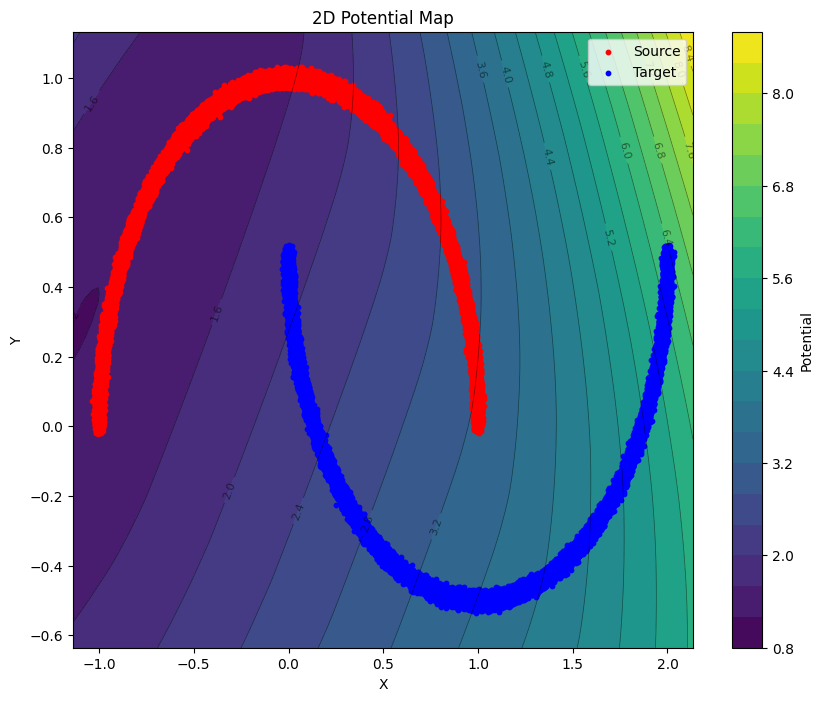

In [8]:
source, target = make_2d_data(dataset='moons', n_samples=2**17, noise=0.01)
model = w2ot(source, target, 0.1, device, path='./saved_models/w2ot/moons_10k_hlr')
model.fit_potential_function(num_iters=10000, lr_init=1e-3, lr_min=1e-3, resume_from_checkpoint=False)
model.plot_2dpotential()

Training: 100%|████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [38:33<00:00, 21.61it/s, W2=0.99]


Training completed.


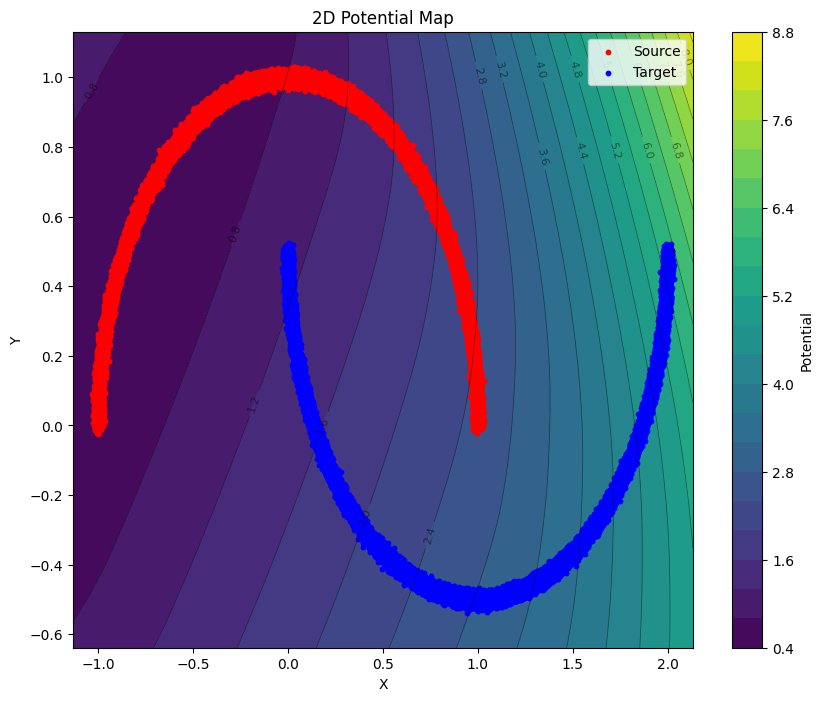

In [5]:
source, target = make_2d_data(dataset='moons', n_samples=2**17, noise=0.01)
model = w2ot(source, target, 0.1, device, path='./saved_models/w2ot/moons_50k')
model.fit_potential_function(num_iters=50000, resume_from_checkpoint=False)
model.plot_2dpotential()

Training: 100%|████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [1:18:00<00:00, 21.37it/s, W2=0.82]


Training completed.


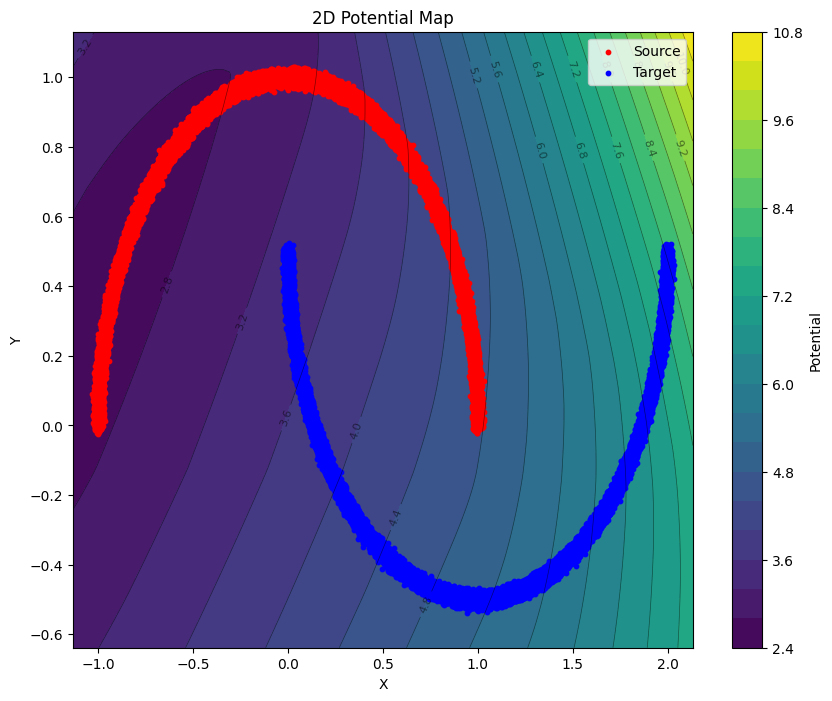

In [6]:
source, target = make_2d_data(dataset='moons', n_samples=2**17, noise=0.01)
model = w2ot(source, target, 0.1, device, path='./saved_models/w2ot/moons_100k')
model.fit_potential_function(num_iters=100000, resume_from_checkpoint=False)
model.plot_2dpotential()

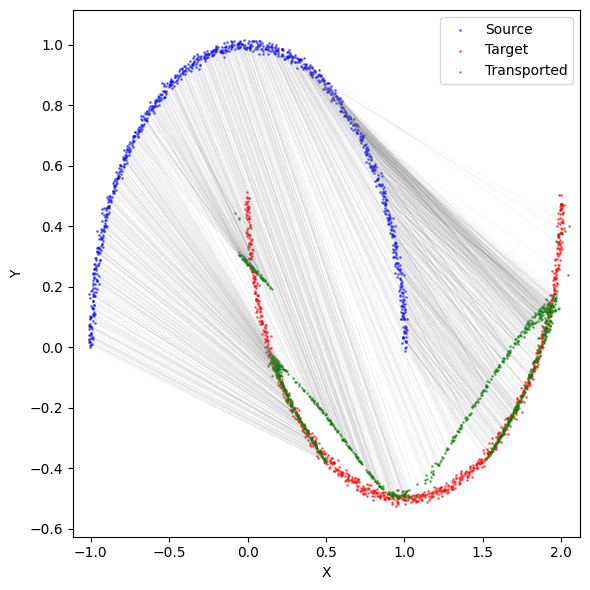

In [7]:
source, target = make_2d_data(dataset='moons', n_samples=2000, noise=0.01)
transported = model.transport(source)
plot_2d_data(source, target, transported)